# Fitting AUSF

The model requires the fitting of pig population dynamics and ASF disease dynamics. We first fit the population to ensure that the population returns to the carrying capacity

### Load Modules

In [1]:
using GpABC, Distances, Distributions, Plots, StatsBase, Printf
using DiffEqCallbacks, DifferentialEquations, LinearAlgebra
using DelimitedFiles, DataFrames, LinearAlgebra, SparseArrays


In [2]:
using QuadGK

In [3]:
include("/home/callum/ASF/Modules/ASF_input.jl");
include("/home/callum/ASF/Modules/ASF_model.jl");
include("/home/callum/ASF/Modules/ASF_analysis.jl")

Main.ASF_Analysis

In [4]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data

### Model

In [5]:
input = ASF_Inputs.Model_Data(input_path, true); #loading the model input

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.2
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Mean feral group size of 50.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:149
┌ Warning: Boar to group ratio of 0.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:153
┌ Warning: Intra-group transmission of 0.4
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.05
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.7
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups

In [6]:
const nt = input.Parameters.Populations.cum_sum[end] #total number of groups and farms
const nc = 5 #number of classes
const eqs = 11 #number of processes

const dc = sparse(zeros(nt*nc,nt*eqs))

#const _dc = zeros(nt*5,nt*10)

dc[0*nc*nt+1:nc*nt*eqs+nc:end] .= 1
dc[1*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[2*nc*nt+1:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+1:nc*nt*eqs+nc:end] .= 1

dc[2*nc*nt+2:nc*nt*eqs+nc:end] .= 1
dc[3*nc*nt+2:nc*nt*eqs+nc:end] .= -1
dc[4*nc*nt+2:nc*nt*eqs+nc:end] .= -1

dc[4*nc*nt+3:nc*nt*eqs+nc:end] .= 1
dc[5*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[6*nc*nt+3:nc*nt*eqs+nc:end] .= -1
dc[7*nc*nt+3:nc*nt*eqs+nc:end] .= -1

dc[7*nc*nt+4:nc*nt*eqs+nc:end] .= 1
dc[8*nc*nt+4:nc*nt*eqs+nc:end] .= -1
dc[10*nc*nt+4:nc*nt*eqs+nc:end] .= -1


dc[5*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[6*nc*nt+5:nc*nt*eqs+nc:end] .= 1
dc[9*nc*nt+5:nc*nt*eqs+nc:end] .= -1;

In [7]:
function regular_c(du,u,p,t,counts,mark)  
    mul!(du,dc,counts)
    nothing
end

regular_c (generic function with 1 method)

In [8]:

function run_analysis(sol)
   
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0
   
        s_d = data[:,1:5:end]
        e_d = data[:,2:5:end]
        i_d = data[:,3:5:end]
        r_d = data[:,4:5:end]
        c_d = data[:,5:5:end]
 
        disease_total = e_d + i_d + c_d #classes with disease,
        disease_alive = e_d + i_d
 
        disease_free = s_d + r_d #classes without disease,
 
        disease_sum = sum(disease_total,dims=2)
        disease_alive_sum =  sum(disease_alive,dims=2)
        disease_free_sum = sum(disease_free,dims=2)
        population_sum = disease_alive_sum + disease_free_sum;
   
        return disease_sum, disease_alive_sum, disease_free_sum, population_sum
    end

run_analysis (generic function with 1 method)

In [9]:
input = ASF_Inputs.Model_Data(input_path, true); #loading the model input
params = ASF_Model.convert(input.Parameters);

┌ Info: Running with seasons
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:54
┌ Info: Watts Strogatz Small Worlds Network
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:60
┌ Info: Rho: 0.2
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:61
┌ Warning: Mean feral group size of 50.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:149
┌ Warning: Boar to group ratio of 0.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:153
┌ Warning: Intra-group transmission of 0.4
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:177
┌ Warning: Inter-group transmission of 0.05
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:181
┌ Warning: Corpse infectivity of 0.7
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:185
┌ Warning: Immunity period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:189
┌ Warning: Deacy period of 7.0
└ @ Main.ASF_Inputs /home/callum/ASF/Modules/ASF_input.jl:193
┌ Info: 1000 Feral Groups

In [10]:
mean(sum(params[3], dims=1))

8.0

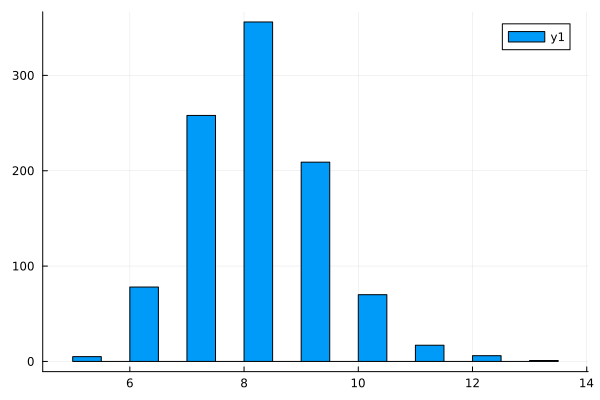

In [11]:
histogram(sum(params[3], dims=1)')

In [12]:
function asf_model_one(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area    = p 
    ref_density = 1 #baseline density (from Baltics where modelled was fitted)
    offset = 180 #seeding in the summer!
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt8}(u[1:5:end])
    E = Vector{UInt8}(u[2:5:end])
    I = Vector{UInt8}(u[3:5:end])
    R = Vector{UInt8}(u[4:5:end])
    C = Vector{UInt8}(u[5:5:end])

    N = S .+ E .+ I .+ R .+ C
    Np = S .+ E .+ I .+ R
    
    N[N .== 0] .= 1
    
    tg = length(Np) #total groups in all populations
    tp = sum(Np) # total living pigs

    Density = ((tp/Area)/ref_density)^(η) #density of population for beta
    connected_pops = β_b * Np
    #Deaths = μ_p.*(σ .+ ((1-σ)-0.05).*Np.^θ.*K.^(-θ))
    Deaths = μ_p.*(σ .+ ((1-σ)-0.05).*sqrt.(Np)./sqrt.(K))
    if Seasonal #running with seasons

        Lambda = λ + la * cos((t + offset + lo) * 2*pi/year)

        p_mag = birth_pulse_vector(t,k,bw,bo)
        Births = p_mag.*(σ .* Np .+ ((1-σ)) .* sqrt.(Np .* K))#Np.^(1-θ) .* K.^θ)
        
        #now stopping boar births
        mask_boar = (K .== 1) .& (Np .> 0)
        boar_births = sum(mask_boar)
        Births[mask_boar] .= 0
        mask_p_s = (Np .> 1) .& (K .> 1)
        Births[mask_p_s] .+= p_mag*boar_births ./ sum(mask_p_s) 

        if  p_mag > mean(μ_p)
            mask_em =  (Np .> 3) .& (K .> 1)
            mask_im = (Np .== 0) .& (connected_pops .> 3) #population zero but connected groups have 3 or more pigs
            extra_b = sum(Births[mask_im] .= 3*p_mag)
            Births[mask_em] .-= extra_b ./ sum(mask_p_s)
        end
    else

        Lambda = λ

        Births = μ_p.*(σ .* Np .+ (1-σ) .* Np.^(1-θ) .* K.^θ)

        mask_boar = (K .== 1) .& (Np .> 0)
        boar_births = sum(mask_boar)
        Births[mask_boar] .= 0
        mask_p_s = (Np .> 1) .& (K .> 1)
        Births[mask_p_s] .+= μ_p*boar_births ./ sum(mask_p_s) 

        #Immigration births (only happens around pulse time with the influx of births)
        mask_em =  (Np .> 3) .& (K .> 1)
        mask_im = (Np .== 0) .& (connected_pops .> 3)
        extra_b = sum(Births[mask_im] .= 3*μ_p)
        Births[mask_em] .-= extra_b ./ sum(mask_p_s)
        
    end

    #populations = N.*β_b + (N.*β_b)'
    v = ones(Int8,tg)
        
    populations  = v*N'+ N*v'

    out[1:11:end] .= Births
    out[2:11:end] .= S.*Deaths
    out[3:11:end] .=  (((Density .* β_o .* S) ./ populations)*(I .+ ω .* C)).+ β_i .* (S ./ N) .* (I .+ ω .* C)
    out[4:11:end] .= E.*Deaths
    out[5:11:end] .= ζ .* E
    out[6:11:end] .= ρ .* γ .* I 
    out[7:11:end] .= I.*Deaths
    out[8:11:end] .= γ .* (1 .- ρ) .* I
    out[9:11:end] .= R.*Deaths
    out[10:11:end].= (1 ./ Lambda) .* C
    out[11:11:end] .= κ .* R 


    nothing
end

asf_model_one (generic function with 1 method)

In [13]:
function birth_pulse_vector(t,k,s,p)
    return k*exp(-s*cos(pi*(t+p)/365)^2)
end
function birth_pulse(t,k,s,p)
    return k.*exp.(-s.*cos.(pi.*(t.+p)./365).^2)
end

birth_pulse (generic function with 1 method)

In [14]:
U0 = copy(input.U0);
#U0[1:5:end] += (U0[2:5:end] +U0[3:5:end]) #setting init pop to zero
#U0[2:5:end] .= 0
#U0[3:5:end] .= 0;
#U0[U0 .> 4] .= 10;
#params = ASF_Model.convert(input.Parameters);

In [15]:
rj = RegularJump(asf_model_one, regular_c, eqs*nt)
prob = DiscreteProblem(U0,(0.0,10*365),params)
jump_prob = JumpProblem(prob,Direct(),rj)


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a regular jump


In [16]:
sol = solve(jump_prob, SimpleTauLeaping(),dt=1)
disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(sol);

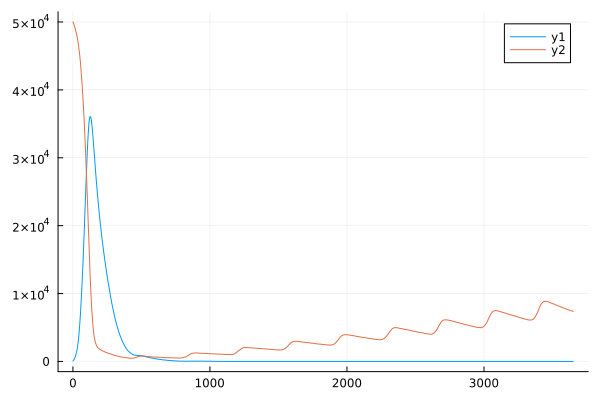

In [17]:
plot(disease_sum)
plot!(population_sum)

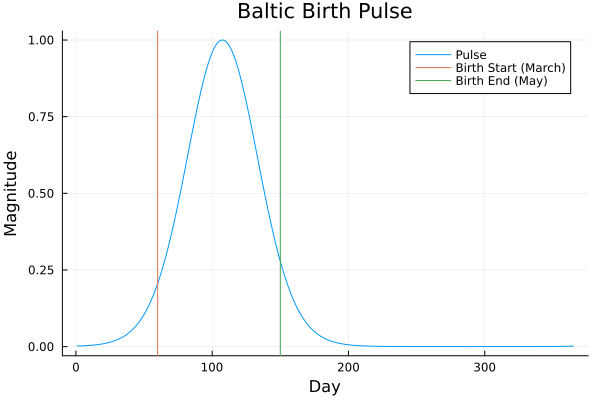

In [18]:
t = 1:365
plot(t, birth_pulse(t,1,10,75), label = "Pulse", title="Baltic Birth Pulse", ylabel="Magnitude",xlabel="Day")
vline!([60], label = "Birth Start (March)")
vline!([150], label = "Birth End (May)")

In [19]:
using BenchmarkTools


In [20]:
@benchmark solve(jump_prob, SimpleTauLeaping(),dt=1)

BenchmarkTools.Trial: 
  memory estimate:  24.12 GiB
  allocs estimate:  625884
  --------------
  minimum time:     11.624 s (4.57% GC)
  median time:      11.624 s (4.57% GC)
  mean time:        11.624 s (4.57% GC)
  maximum time:     11.624 s (4.57% GC)
  --------------
  samples:          1
  evals/sample:     1

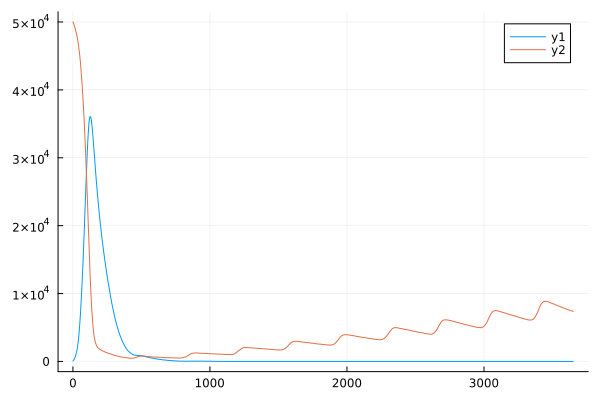

In [21]:
plot(disease_sum)
plot!(population_sum)

In [204]:
function asf_model_pop(out,u,p,t)
    #ASF model for a single population (can make some speed increases) without farms!

    β_i, β_o, β_b, μ_p, K, ζ, γ, ω, ρ, λ, κ, σ, θ, η, g, Seasonal, bw, bo, k, la, lo, Area  = p 
    
    offset = 0 #seeding in the summer!
    year = 365 #days in a year

    u[u.<0] .= 0
    
    S = Vector{UInt32}(u[1:5:end])
    
    connected_pops = β_b * S
    
    p_mag = birth_pulse_vector(t+offset,k,bw,0)
    Births = p_mag.*(σ .* S .+ ((1-σ)) .* sqrt.(S.*K))
        
        #now stopping boar births
    mask_boar = (K .== 1) .& (S .> 0)
    boar_births = sum(mask_boar)
    Births[mask_boar] .= 0
    mask_p_s = (S .> 1) .& (K .> 1)
    Births[mask_p_s] .+= p_mag*boar_births ./ sum(mask_p_s) 

    if  p_mag > 0.5*μ_p[1]
        mask_em =  (S .> 3) .& (K .> 1)
        mask_im = (S .== 0) .& (connected_pops .> 5) #population zero but connected groups have 3 or more pigs
        extra_b = sum(Births[mask_im] .= 5*p_mag)
        Births[mask_em] .-= extra_b ./ sum(mask_p_s)
    end
    
    out[1:11:end] .= Births
    out[2:11:end] .= S.*μ_p.*(σ .+ ((1-σ)-g).*sqrt.(S./K))

    nothing
end

asf_model_pop (generic function with 1 method)

In [205]:
  input = ASF_Inputs.Model_Data(input_path);

    U0 = copy(input.U0);
    U0[1:5:end] += (U0[2:5:end] +U0[3:5:end]) #setting init pop to zero
    U0[2:5:end] .= 0
    U0[3:5:end] .= 0;
    
    params = ASF_Model.convert(input.Parameters);

In [206]:
rj = RegularJump(asf_model_pop, regular_c, eqs*nt)
prob = DiscreteProblem(U0,(0.0,10*365),params)
jump_prob = JumpProblem(prob,Direct(),rj)


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a regular jump


In [208]:
sol = solve(jump_prob, SimpleTauLeaping(),dt=1)
disease_sum, disease_alive_sum, disease_free_sum, population_sum  = run_analysis(outputs[3]);

### Fitting Population

In [264]:
AUSF_pop = function(params,Tspan, U0)
    #function that runs model for fitting

    rj = RegularJump(asf_model_pop, regular_c, eqs*nt)

    prob = DiscreteProblem(U0,Tspan,params)

    jump_prob = JumpProblem(prob,Direct(),rj)

    ensemble_prob_m = EnsembleProblem(jump_prob)

    outputs = solve(ensemble_prob_m, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1);

    res = eval_out_pop(outputs,U0)

    return res
end
    

function simulator_function_pop(var_params)

   
    input = ASF_Inputs.Model_Data(input_path);

    U0 = copy(input.U0);
    U0[1:5:end] += (U0[2:5:end] +U0[3:5:end]) #setting init pop to zero
    U0[2:5:end] .= 0
    U0[3:5:end] .= 0;
    
    params = ASF_Model.convert(input.Parameters)
    
    params[15] = var_params[1] #corpse decay rates
    
    Time = (0.0,n_years*365)
    #now we run simulation!
    AUSF_pop(params, Time, U0)
end

function eval_out_pop(output, U0)
    output_final = Matrix{Float64}(undef,(n_years*365+1,1))
    dist = zeros(Float64,n_runs)
    K = sum(U0)
   dummy = zeros(n_years*365+1)
    
    for i = 1:n_runs
        sol = output[i]
        data = reduce(vcat,transpose.(sol.u))
        data[data .< 0 ] .= 0

        s_d = data[:,1:5:end]
        
        pop_sum = sum(s_d,dims=2)[:,1]
        
        pop_crop = pop_sum./ode_norm
 
        dummy += pop_crop/n_runs
        
    
    end
    output_final[:] = dummy
    dist = euclidean(obs[:],dummy)
    if dist < threshold
        println(1)
  
    end
    return output_final
    
end

function observed_params()
   
    obs =  Matrix{Float64}(undef,(n_years*365+1,1))
    
    obs .= 1
    
    return obs
end

observed_params (generic function with 1 method)

In [244]:
#Need to figure out the norm
input = ASF_Inputs.Model_Data(input_path);

U0_ode = [sum(input.U0)];
p_ode = [input.Parameters.σ[1],sum(input.Parameters.K),input.Parameters.μ_p[1]];
tspan_ode = (0.0,10*365.0);

In [245]:
prob_ode = ODEProblem(density_carrying!, U0_ode, tspan_ode, p_ode)
sol_ode = solve(prob_ode, saveat = 1,reltol=1e-8);
ode_norm = reduce(vcat,transpose.(sol_ode.u));

In [262]:
#Some key parameters for G

input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 10 #how many years each sim will run for
n_runs = 3 #how many runs for each param
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0, 0.1)];

In [265]:
#Our params for fitting
n_particles = 100 #number of acceptances we want
devi = 0.99 #how close (from 0-1 with 1 being identical) do we want output to be to observed, used for threshold
threshold = sqrt((n_years*365+1)*((1-devi)^2));

In [ ]:
sim_result = SimulatedABCRejection(obs, simulator_function_pop, priors, threshold, n_particles; max_iter=10000, write_progress=false)#,

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


### Fitting ASF

Here we are fitting the diease dynamics to previously observed effects from outbreaks in the Baltic States

In [ ]:
function AUSF_d(dis_params,Tspan,U0)
     rj = RegularJump(ASF_Model.asf_model_one, regular_c, eqs*nt)
    prob = DiscreteProblem(U0,Tspan,dis_params)
    jump_prob = JumpProblem(prob,Direct(),rj)
    ensemble_prob = EnsembleProblem(jump_prob)
    model_outs = solve(ensemble_prob, SimpleTauLeaping(), trajectories= n_runs,EnsembleThreads(),dt=1)
    res = eval_out(model_outs)
end
    
function simulator_function_d(var_params)
    Tspan = (0.0,365*n_years)
    
    input = ASF_Inputs.Model_Data(input_path);
    U0 = input.U0
    params = ASF_Model.convert(input.Parameters)
    
    #beta
    params[1] .= var_params[1] #intra
    params[2][params[2] .!= 0 ] .= var_params[2]/n_con #inter
    
    #corpse 
    params[10] = var_params[3] #corpse infection modifier

    AUSF_d(params, Tspan, U0)
end

function eval_out(data) 

    output_final = Matrix{Float64}(undef,(3,1))
    s = 0
    ep = 0
    mt = 0
    pd = 0
    
    for i in 1:n_runs
        d, da,f,p = run_analysis(data[i])

        if d[end] > 0

            ep += 100*mean(da[3*365:end])/mean(p[3*365:end])
            pd += 100*(1-mean(p[3*365:end])/p[1])
            mt += maximum(findall(==(maximum(d)), d))[1]


            s += 1
        end

    end
    
    
    if s >= 2
        output_final[1] = ep/s*(1/2)
        output_final[2] = pd/s*(1/10)
        output_final[3] = mt/s*(2/365)
        
    else
        output_final[1] = 0
        output_final[2] = 0
        output_final[3] = 0
    end
    
    d= euclidean(output_final,obs)
    if d < threshold
        println(d)
    end

    return output_final
    
end

function observed_params()
   
    obs =  Matrix{Float64}(undef,(3,1))
    
    obs[1] = 1 #2 #endemic prev
    obs[2] = 8#80 #population delcine %
    obs[3] = 2#180 #time (days) from init to max
    
    return obs
end

In [ ]:
input_path = "/home/callum/ASF/Inputs/"; #path to model data
n_years = 5 #how many years each sim will run for
n_runs = 3 #how many runs for each param
n_con = 8  # average number of connections each group has
obs = observed_params() #our observed (just array of ones, we normalise output to be relative to this)
priors = [Uniform(0.15, 0.85), Uniform(0.015, 0.085), Uniform(0.15, 1)];

In [ ]:
n_particles = 100;
threshold_schedule = [1.0, 0.8, 0.7];

In [ ]:
sim_abcsmc_res = SimulatedABCSMC(obs,simulator_function_d,priors,threshold_schedule,n_particles; write_progress=false)